# Chapter 18 - Understanding Experimental Data

This chapter is about understanding experimental data. We will make extensive
use of plotting to visualize the data, and show how to use linear regression to
build a model of experimental data. We will also talk about the interplay between
physical and computational experiments. We defer our discussion of how to
draw a valid statistical conclusion to Chapter 19.

## 18.1 The Behaviour of Springs 

Springs are wonderful things. When they are compressed or stretched by some
force, they store energy. When that force is no longer applied they release the
stored energy. This property allows them to smooth the ride in cars, help mattresses conform to our bodies, retract seat belts, and launch projectiles.
In 1676 the British physicist Robert Hooke formulated Hooke’s law of elasticity: Ut tensio, sic vis, in English, F	=	-kx. In other words, *__the force F stored in a
spring is linearly related to the distance the spring has been compressed (or
stretched). (The minus sign indicates that the force exerted by the spring is in the
opposite direction of the displacement.)__* Hooke’s law holds for a wide variety of
materials and systems, including many biological systems. Of course, it does not
hold for an arbitrarily large force. *__All springs have an elastic limit, beyond which
the law fails__*. Those of you who have stretched a Slinky too far know this all too
well.

The constant of proportionality, k, is called the spring constant. If the spring
is stiff (like the ones in the suspension of a car or the limbs of an archer’s bow), k
is large. If the spring is weak, like the spring in a ballpoint pen, k is small.

Knowing the spring constant of a particular spring can be a matter of some
import. The calibrations of both simple scales and atomic force microscopes depend upon knowing the spring constants of components. The mechanical behavior of a strand of DNA is related to the force required to compress it. The force
with which a bow launches an arrow is related to the spring constant of its limbs.
And so on.

Generations of physics students have learned to estimate spring constants using an experimental apparatus similar to that pictured here.

![](spring_pics.jpg)

We start with a spring with no weight on it, and measure the distance to the
bottom of the spring from the top of the stand. We then hang a known mass on
the spring, and wait for it to stop moving. At this point, the force stored in the
spring is the force exerted on the spring by the weight hanging from it. This is the
value of F in Hooke’s law. We again measure the distance from the bottom of the
spring to the top of the stand. The difference between this distance and the distance before we hung the weight then becomes the value of x in Hooke’s law.

We know that the force, F, being exerted on the spring is equal to the mass,
m, multiplied by the acceleration due to gravity, g (9.81	m/s2 is a pretty good approximation of g on this planet), so we substitute m*g for F. By simple algebra we
know that $ k =	-(mg)/x $. 

According to this calculation, it will take 98.1 Newtons of force to stretch the
spring one meter. This would all be well and good if:

* We had complete confidence that we would conduct this experiment perfectly.
In that case, we could take one measurement, perform the calculation, and
know that we had found k. Unfortunately, experimental science hardly ever
works this way.

* We could be sure that we were operating below the elastic limit of the spring.

A more robust experiment would be to hang a series of increasingly heavier
weights on the spring, measure the stretch of the spring each time, and plot the
results. We ran such an experiment, and typed the results into a file named
springData.txt:

In [10]:
f = open('springData.txt', 'r')

for line in f:
    print(line)

f.close()

Distance (m) Mass (kg)

0.0865 0.1

0.1015 0.15

0.1106 0.2

0.1279 0.25

0.1892 0.3

0.2695 0.35

0.2888 0.4

0.2425 0.45

0.3465 0.5

0.3225 0.55

0.3764 0.6

0.4263 0.65

0.4562 0.7

0.4502 0.75

0.4499 0.8

0.4534 0.85

0.4416 0.9

0.4304 0.95

0.437 1.0



The function below reads data from a file such as the one we saved,
and returns lists containing the distances and masses.

In [16]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = [] #list
    masses = [] #list
    
    dataFile.readline() #ignore header
    
    for line in dataFile:
        d,m = line.split(' ') #split over empty space
        distances.append(float(d))
        masses.append(float(m))
        
    dataFile.close()
    
    return (masses, distances)

The function below uses getData to extract the experimental data from the file and then produces the plot.

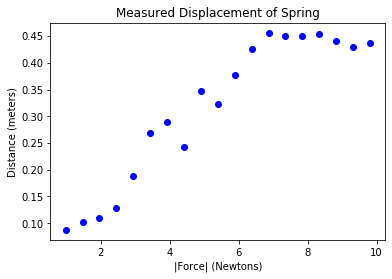

In [38]:
import pylab

def plotData(inputFile):
    masses, distances = getData(inputFile)
    
    #convert lisy into vector array so that it is amenable for scalar multiplication.
    distances =  pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    
    pylab.plot(forces, distances, 'bo', label='Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
plotData('springData.txt')

This is not what Hooke’s law predicts. Hooke’s law tells us that the distance
should increase linearly with the mass, i.e., the points should lie on a straight line
the slope of which is determined by the spring constant. Of course, we know that
when we take real measurements the experimental data are rarely a perfect match
for the theory. Measurement error is to be expected, so we should expect the
points to lie around a line rather than on it.

Still, it would be nice to see a line that represents our best guess of where the
points would have been if we had no measurement error. The usual way to do
this is to fit a line to the data.

### 18.1.1 Using Linear Regression to Find a Fit

Whenever we fit any curve (including a line) to data we need some way to decide
which curve is the best fit for the data. This means that we need to define an objective function that provides a quantitative assessment of how well the curve fits
the data. Once we have such a function, finding the best fit can be formulated as
finding a curve that minimizes (or maximizes) the value of that function, i.e., as
an optimization problem (see Chapters 12 and 13).

The most commonly used objective function is called least squares. Let observed and predicted be vectors of equal length, where observed contains the
measured points and predicted the corresponding data points on the proposed fit.

The objective function is then defined as:

$ \sum_{i=0}^{len(observed)-1} \left( \text{observed}[i] - \text{predicted}[i]\right)^{2} $

*__Squaring the difference between observed and predicted points makes large differences between observed and predicted points relatively more important than
small differences. Squaring the difference also discards information about
whether the difference is positive or negative__*.

How might we go about finding the best least-squares fit? One way to do this
would be to use a successive approximation algorithm similar to the NewtonRaphson algorithm in Chapter 3. Alternatively, there is are analytic solutions that
is often applicable. But we don’t have to implement either, because PyLab provides a built-in function, polyfit, that finds an approximation to the best leastsquares fit. The call

    pylab.polyfit (observedXVals, observedYVals, n)
    
finds the coefficients of a polynomial of degree n that provides a best leastsquares fit for the set of points defined by the two arrays $\text{observedXVals}$ and $\text{observedYVals}$. For example, the call

    pylab.polyfit(observedXVals, observedYVals, 1)
    
will find a line described by the polynomial y	=	ax	+	b, where a is the slope of the
line and b the y-intercept. In this case, the call returns an array with two floating
point values. Similarly, a parabola is described by the quadratic equation
$y = ax^{2} + bx + c$. Therefore, the call

    pylab.polyfit(observedXVals, observedYVals, 2)
    
returns an array with three floating point values.

The algorithm used by polyfit is called linear regression. This may seem a bit
confusing, since we can use it to fit curves other than lines. Some authors do
make a distinction between linear regression (when the model is a line) and polynomial regression (when the model is a polynomial with degree greater than 1),
but most do not.

The function fitData in Figure 18.5 extends the plotData function in Figure
18.3 by adding a line that represents the best fit for the data. It uses polyfit to
find the coefficients a and b, and then uses those coefficients to generate the predicted spring displacement for each force. Notice that there is an asymmetry in
the way forces and distance are treated. The values in forces (which are derived
from the mass suspended from the spring) are treated as independent, and used
to produce the values in the dependent variable predictedDistances (a prediction
of the displacements produced by suspending the mass).

The function also computes the spring constant, k. The slope of the line, a, is
∆distance/∆force. The spring constant, on the other hand, is ∆force/∆distance.
Consequently, k is the inverse of a.

In [41]:
import pylab

def fitData(inputFile):
    masses, distances = getData(inputFile)
    
    #convert lisy into vector array so that it is amenable for scalar multiplication.
    distances =  pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    
    pylab.plot(forces, distances, 'bo', label='Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label = 'Displacements predicted by\nlinear fit, k = '
                + str(round(k, 5)))
    pylab.legend(loc='best')

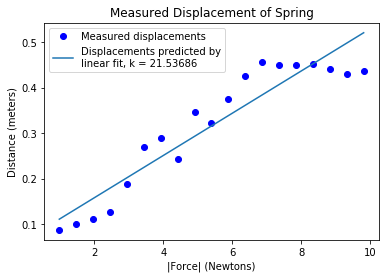

In [42]:
fitData('springData.txt')

It is interesting to observe that very few points actually lie on the leastsquares fit. This is plausible because we are trying to minimize the sum of the
squared errors, rather than maximize the number of points that lie on the line.
Still, it doesn’t look like a great fit. Let’s try a cubic fit by adding to fitData the
code.

    #find cubic fit
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label = 'cubic fit')
    
In this code, we have used the function polyval to generate the points associated with the cubic fit. This function takes two arguments: a sequence of polynomial coefficients and a sequence of values at which the polynomial is to be
evaluated. The code fragments:

    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    
and

    a,b,c,d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    
are equivalent.

This produces the plot in Figure 18.7. The cubic fit looks like a much better
model of the data than the linear fit, but is it? Probably not.

In [48]:
import pylab

def fitData(inputFile):
    masses, distances = getData(inputFile)
    
    #convert lisy into vector array so that it is amenable for scalar multiplication.
    distances =  pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    
    pylab.plot(forces, distances, 'bo', label='Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find cubic fit
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label = 'cubic fit')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label = 'Displacements predicted by\nlinear fit, k = '
                + str(round(k, 5)))
    pylab.legend(loc='best')

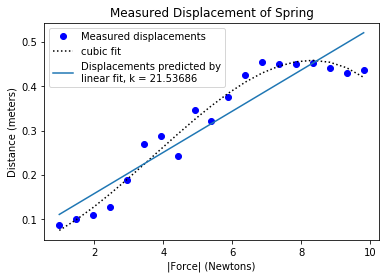

In [49]:
fitData('springData.txt')

In the technical literature, one frequently sees plots like this that include both
raw data and a curve fit to the data. All too often, however, the authors then go
on to assume that the fitted curve is the description of the real situation, and the
raw data merely an indication of experimental error. This can be dangerous.
Recall that we started with a theory that there should be a linear relationship
between the x and y values, not a cubic one. Let’s see what happens if we use our
cubic fit to predict where the point corresponding to hanging a 1.5kg weight
would lie, Figure 18.8.

![](cubic_fit.jpg)

Now the cubic fit doesn’t look so good. In particular, it seems highly unlikely
that by hanging a large weight on the spring we can cause the spring to rise above
(the y value is negative) the bar from which it is suspended. *__What we have is an
example of overfitting. Overfitting typically occurs when a model is excessively
complex, e.g., it has too many parameters relative to the amount of data. When
this happens, the fit can capture noise in the data rather than meaningful relationships__*. A model that has been overfit usually has poor predictive power, as
seen in this example.

Let’s go back to the linear fit. For the moment, forget the line and study the
raw data. Does anything about it seem odd? If we were to fit a line to the rightmost six points it would be nearly parallel to the x-axis. This seems to contradict
Hooke’s law—until we recall that Hooke’s law holds only up to some elastic limit.
Perhaps that limit is reached for this spring somewhere around 7N (approximately 0.7kg).
Let’s see what happens if we eliminate the last six points by replacing the second and third lines of fitData by

    distances = pylab.array(distances[:-6])
    masses = pylab.array(masses[:-6])

In [50]:
import pylab

def fitData(inputFile):
    masses, distances = getData(inputFile)
    
    #convert lisy into vector array so that it is amenable for scalar multiplication.
#     distances =  pylab.array(distances)
#     masses = pylab.array(masses)
    distances = pylab.array(distances[:-6])
    masses = pylab.array(masses[:-6])
    forces = masses*9.81
    
    pylab.plot(forces, distances, 'bo', label='Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find cubic fit
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label = 'cubic fit')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label = 'Displacements predicted by\nlinear fit, k = '
                + str(round(k, 5)))
    pylab.legend(loc='best')

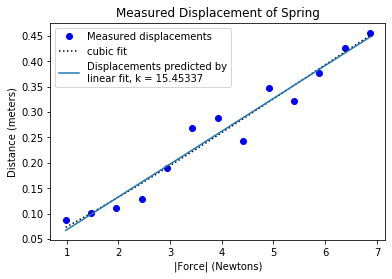

In [51]:
fitData('springData.txt')

As Figure 18.9 shows, eliminating those points certainly makes a difference:
k has dropped dramatically and the linear and cubic fits are almost indistinguishable. But how do we know which of the two linear fits is a better representation of how our spring performs up to its elastic limit? We could use some
statistical test to determine which line is a better fit for the data, but that would
be beside the point. This is not a question that can be answered by statistics. After all we could throw out all the data except any two points and know that
polyfit would find a line that would be a perfect fit for those two points. One
should never throw out experimental results merely to get a better fit. *__Here we
justified throwing out the rightmost points by appealing to the theory underlying
Hooke’s law, i.e., that springs have an elastic limit__*. That justification could not
have been appropriately used to eliminate points elsewhere in the data.

## 18.2 The Behaviour of Projectiles

Growing bored with merely stretching springs, we decided to use one of our
springs to build a device capable of launching a projectile.123 We used the device
four times to fire a projectile at a target 30 yards (1080 inches) from the launching point. Each time, we measured the height of the projectile at various distances from the launching point. The launching point and the target were at the same
height, which we treated as 0.0 in our measurements.

The data was stored in a file with the contents shown in Figure 18.10. The
first column contains distances of the projectile from the target. The other columns contain the height of the projectile at that distance for each of the four trials. All of the measurements are in inches.

In [61]:
f = open('launcherData.txt','r')

for line in f:
    print(line)
    
f.close()

Distance	trial1	trial2	trial3	trial4

1080  		0.0 	0.0	0.0 	0.0

1044		2.25	3.25	4.5	6.5

1008		5.25	6.5	6.5	8.75

972		7.5	7.75	8.25	9.25

936		8.75	9.25	9.5	10.5

900		12.0	12.25	12.5	14.75

864		13.75	16.0	16.0	16.5

828		14.75	15.25	15.5	17.5

792		15.5	16.0	16.6	16.75

756		17.0	17.0	17.5	19.25

720		17.5	18.5	18.5	19.0

540		19.5	20.0	20.25	20.5

360		18.5	18.5	19.0	19.0

180		13.0	13.0	13.0	13.0

0		0.0	0.0	0.0 	0.0



The code in Figure 18.11 was used to plot the mean altitude of the projectile
in the four trials against the distance from the point of launch. It also plots the
best linear and quadratic fits to those points. (In case you have forgotten the
meaning of multiplying a list by an integer, the expression $[0].len(distances)$
produces a list of len(distances) 0’s.)`m

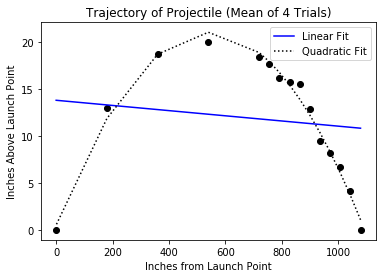

In [86]:
import pylab

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    dataFile.readline()
    
    #Create empty lists.
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName) #Both distances and heights are lists.
    numTrials = len(heights)
    distances = pylab.array(distances)
    
    #Get array containing mean height at each distances
    totHeights = pylab.array([0]*len(distances))
    
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    
    meanHeights = totHeights/len(heights)
    
    pylab.title('Trajectory of Projectile (Mean of ' + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit')
    
    fit = pylab.polyfit(distances, meanHeights, 2)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    pylab.legend()
    
processTrajectories('launcherData.txt')

A quick look at the plot in Figure 18.12 makes it quite clear that a quadratic
fit is far better than a linear one. (The reason that the quadratic fit is so
bumpy-looking on the left side is that we are plotting only the predicted heights
that correspond to the measured heights, and we have very few points to the left
of 600.) But just how bad a fit is the line and how good is the quadratic fit?

### 18.2.1 Coefficient of Determination

When we fit a curve to a set of data, we are finding a function that relates an independent variable (inches horizontally from the launch point in this example)
to a predicted value of a dependent variable (inches above the launch point in
this example). *__Asking about the goodness of a fit is equivalent to asking about the
accuracy of these predictions__*. Recall that the fits were found by minimizing the
mean square error. This suggests that one could evaluate the goodness of a fit by
looking at the mean square error. The problem with that approach is that while
there is a lower bound for the mean square error (0), there is no upper bound.
This means that while the mean square error is useful for comparing the relative
goodness of two fits to the same data, it is not particularly useful for getting a
sense of the absolute goodness of a fit.

We can calculate the absolute goodness of a fit using the coefficient of determination, often written as $R^{2}$. Let $y_{i}$ be the $i^{\text{th}}$ observed value, $p_{i}$ be the
corresponding value predicted by the model, and $\mu$ be the mean of the observed
values.

$ R^2 = 1 - \frac{\sum_{i} (y_{i} - p_{i})^2}{\sum_{i} (y_{i} - \mu)^2} $

*__By comparing the estimation errors (the numerator) with the variability of
the original values (the denominator), R2 is intended to capture the proportion of
variability (relative to the mean) in a data set that__* is accounted for by the statistical model provided by the fit. When the model being evaluated is produced by a
linear regression, the value of R2 always lies between 0 and 1. If R2 =	1, the model
is a perfect fit to the data. If R2 =	0, there is no relationship between the values
predicted by the model and the way the data is distributed around the mean.

The code below provides a straightforward implementation of this
statistical measure. *__Its compactness stems from the expressiveness of the operations on arrays__*. The expression (predicted - measured) ** 2 subtracts the elements
of one array from the elements of another, and then squares each element in the
result. The expression (measured - meanOfMeasured) ** 2 subtracts the scalar value
meanOfMeasured from each element of the array measured, and then squares each
element of the results.

In [91]:
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values predicted 
       a one-dimensional array of predicted values. Returns coefficient of determination"""
    estimateError = ((predicted - measured)**2).sum()
    meanOfMeasured = measured.sum()/len(measured)
    variability = ((measured - meanOfMeasured)**2).sum()
    return 1-(estimateError/variability)

RSquare of linear fit = 0.0177433205440769
RSquare of quadratic fit = 0.9857653692869693


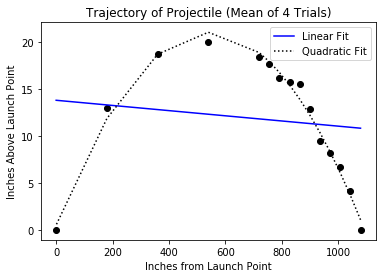

In [93]:
import pylab

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    dataFile.readline()
    
    #Create empty lists.
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName) #Both distances and heights are lists.
    numTrials = len(heights)
    distances = pylab.array(distances)
    
    #Get array containing mean height at each distances
    totHeights = pylab.array([0]*len(distances))
    
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    
    meanHeights = totHeights/len(heights)
    
    pylab.title('Trajectory of Projectile (Mean of ' + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    
    fit = pylab.polyfit(distances, meanHeights, 1)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit')
    print('RSquare of linear fit =', rSquared(meanHeights, altitudes))
    
    fit = pylab.polyfit(distances, meanHeights, 2)
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    pylab.legend()
    print('RSquare of quadratic fit =', rSquared(meanHeights, altitudes))
    
processTrajectories('launcherData.txt')

*__Roughly speaking, this tells us that less than 2% of the variation in the measured
data can be explained by the linear model, but more than 98% of the variation
can be explained by the quadratic model__*.

### 18.2.2 Using a Computational Model

Now that we have what seems to be a good model of our data, we can use this
model to help answer questions about our original data. One interesting question
is the horizontal speed at which the projectile is traveling when it hits the target.
We might use the following train of thought to design a computation that answers this question:

1. We know that the trajectory of the projectile is given by a formula of the
form $y=ax^2+bx+c$, i.e., it is a parabola. Since every parabola is symmetrical around its vertex, we know that its peak occurs halfway between the
launch point and the target; call this distance xMid. The peak height, yPeak, is
therefore given by yPeak = a ∗ xMidv + b ∗ xMid + c.

2. If we ignore air resistance (remember that no model is perfect), we can compute the amount of time it takes for the projectile to fall from yPeak to the
height of the target, because that is purely a function of gravity. It is given by
the equation $t = \sqrt{2yPeak/g}$. This is also the amount of time it takes
for the projectile to travel the horizontal distance from xMid to the target, because once it reaches the target it stops moving.

3. Given the time to go from xMid to the target, we can easily compute the average horizontal speed of the projectile over that interval. If we assume that the
projectile was neither accelerating nor decelerating in the horizontal direction during that interval, we can use the average horizontal speed as an estimate of the horizontal speed when the projectile hits the target.

The following code implements this technique for estimating the horizontal velocity
of the projectile.

In [95]:
def getHorizontalSpeed(quadFit, minX, maxX):
    """Assumes quadFit has coefficients of a quadratic polynomial. minX and maxX 
       are distances in inches .Returns horizontal speed in feet per second"""
    inchesPerFoot = 12
    xMid = (maxX-minX)/2
    a,b,c = quadFit[0], quadFit[1], quadFit[2]
    yPeak = a*xMid**2 + b*xMid + c
    g = 32.16*inchesPerFoot #accel. of gravity in inches/sec/sec
    t = (2*yPeak/g)**0.5 #time in seconds from peak to target
    print('Horizontal speed =', int(xMid/(t*inchesPerFoot)), 'feet/sec')

RSquare of linear fit = 0.0177433205440769
Horizontal speed = 136 feet/sec
RSquare of quadratic fit = 0.9857653692869693


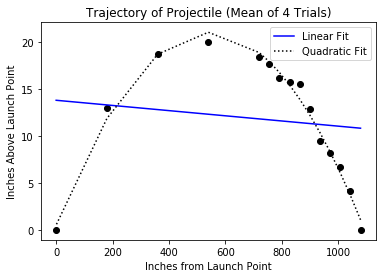

In [98]:
import pylab

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    dataFile.readline()
    
    #Create empty lists.
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName) #Both distances and heights are lists.
    numTrials = len(heights)
    distances = pylab.array(distances)
    
    #Get array containing mean height at each distances
    totHeights = pylab.array([0]*len(distances))
    
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    
    meanHeights = totHeights/len(heights)
    
    pylab.title('Trajectory of Projectile (Mean of ' + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    
    fit = pylab.polyfit(distances, meanHeights, 1)
#     getHorizontalSpeed(fit, distances[-1], distances[0])
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit')
    print('RSquare of linear fit =', rSquared(meanHeights, altitudes))
    
    fit = pylab.polyfit(distances, meanHeights, 2)
    getHorizontalSpeed(fit, distances[-1], distances[0])
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    pylab.legend()
    print('RSquare of quadratic fit =', rSquared(meanHeights, altitudes))
    
processTrajectories('launcherData.txt')

## 18.3 Fitting Exponentially Distributed Data

Polyfit uses linear regression to find a polynomial of a given degree that is the
best least-squares fit for some data. It works well if the data can be directly approximated by a polynomial. But this is not always possible. Consider, for example, the simple exponential growth function y	=	3x. The code in Figure 18.15 fits
a 5th-degree polynomial to the first ten points and plots the results as shown in
Figure 18.16. It uses the function call pylab.arange(10), which returns an array
containing the integers 0-9. The parameter setting markeredgewidth = 2 sets the
width of the lines used in the marker.

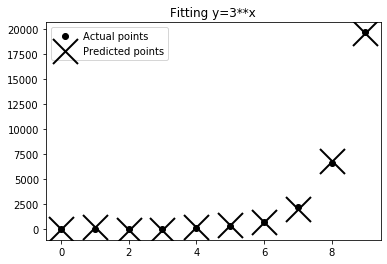

In [101]:
import pylab

vals = []

#Growth function y = 3^x
for i in range(10):
    vals.append(3**i)

pylab.plot(vals,'ko', label = 'Actual points')
xVals = pylab.arange(10)
fit = pylab.polyfit(xVals, vals, 5)
yVals = pylab.polyval(fit, xVals)
pylab.plot(yVals, 'kx', label = 'Predicted points', markeredgewidth = 2, markersize = 25)
pylab.title('Fitting y=3**x')
pylab.legend(loc='upper left')

The fit is clearly a good one, for these data points. However, let’s look at what
the model predicts for 320.

Model predicts that 3**20 is roughly 2.4547827637212492e+48
Actual value of 3**20 is 3486784401


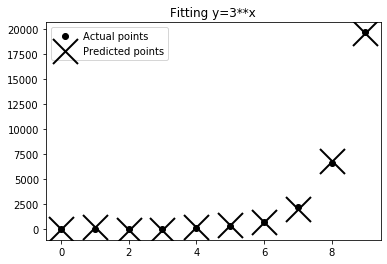

In [102]:
import pylab

vals = []

#Growth function y = 3^x
for i in range(10):
    vals.append(3**i)

pylab.plot(vals,'ko', label = 'Actual points')
xVals = pylab.arange(10)
fit = pylab.polyfit(xVals, vals, 5)
yVals = pylab.polyval(fit, xVals)
pylab.plot(yVals, 'kx', label = 'Predicted points', markeredgewidth = 2, markersize = 25)
pylab.title('Fitting y=3**x')
pylab.legend(loc='upper left')

print('Model predicts that 3**20 is roughly', pylab.polyval(fit, [3**20])[0])
print('Actual value of 3**20 is', 3**20)

Oh dear! Despite fitting the data, the model produced by polyfit is apparently not a good one. Is it because 5 was not the right degree? No. It is because no
polynomial is a good fit for an exponential distribution. Does this mean that we
cannot use polyfit to build a model of an exponential distribution? Fortunately, it does not, because *__we can use polyfit to find a curve that fits the original independent values and the log of the dependent values__*.

Consider the sequence [1,	2, 4,	8,	16,	32,	64,	128,	256,	512]. If we take the log
base 2 of each value. we get the sequence [0,	1,	2,	3,	4,	5,	6,	7,	8,	9], i.e., a sequence
that grows linearly. *__In fact, if a function y	=	f(x), exhibits exponential growth, the
log (to any base) of f(x) grows linearly__*. This can be visualized by plotting an exponential function with a logarithmic y-axis. The code below define an exponential function, then plot on semilog on y-axis.

[]

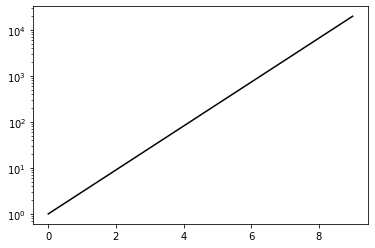

In [105]:
xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(3**i)

pylab.plot(xVals, yVals, 'k')
pylab.semilogy()

That taking the log of an exponential function produces a linear function can
be used to construct a model for an exponentially distributed set of data points,
as illustrated by the code below. *__We use polyfit to find a curve that fits
the x values and log of the y values__*. Notice that we use yet another Python standard library module, math, which supplies a log function. We also use a lambda
expression.

In [112]:
import math
import pylab

def createData(f, xVals):
    """Asssumes f is afunction of one argument xVals is an array of suitable arguments for f.
       f can be implemented as Lambda function. Returns array containing results of applying
       f to the elements of xVals."""
    yVals = []
    for i in xVals:
        yVals.append(f(xVals[i]))
    return pylab.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that yVals[i] == f(xVals[i]), 
       where f is an exponential function. Returns a, b, base such that 
       log(f(x), base) == ax + b."""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y,2.0)) #get log base 2.
    fit = pylab.polyfit(xVals, logVals,1)
    return fit, 2.0

f(20) = 3486784401
Predicted value = 3486784401


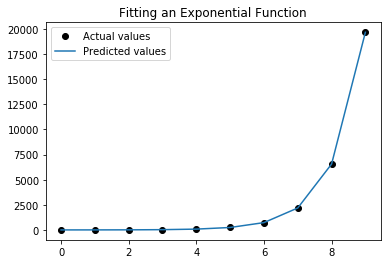

In [119]:
xVals = range(10)
f = lambda x: 3**x
yVals = createData(f, xVals)
pylab.plot(xVals, yVals, 'ko', label = 'Actual values')
fit, base = fitExpData(xVals, yVals)
predictedYVals = []

for x in xVals:
    predictedYVals.append(base**pylab.polyval(fit,x))

pylab.plot(xVals, predictedYVals, label = 'Predicted values')
pylab.title('Fitting an Exponential Function')
pylab.legend(loc = 'upper left')

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted value =', int(base**(pylab.polyval(fit, [20]))))

This method of using polyfit to find a model for data works when the relationship can be described by an equation of the form $y=base^{(ax+b)}$. If used on data
that cannot be described this way, it will yield erroneous results.

## 18.4 When Theory is Missing

In this chapter, we have emphasized the interplay between theoretical, experimental, and computational science. Sometimes, however, we find ourselves with
lots of interesting data, but little or no theory. In such cases, we often resort to
using computational techniques to develop a theory by building a model that
seems to fit the data.

In an ideal world, we would run a controlled experiment (e.g., hang weights
from a spring), study the results, and retrospectively formulate a model consistent with those results. We would then run a new experiment (e.g., hang different weights from the same spring), and compare the results of that experiment
to what the model predicted.
*__Unfortunately, in many cases it is impossible to run even one controlled experiment__*. Imagine, for example, building a model designed to shed light on how
interest rates affect stock prices. Very few of us are in a position to set interest
rates and see what happens. On the other hand, there is no shortage of relevant
historical data.

*__In such situations, one can simulate a set of experiments by dividing the existing data into a training set and a holdout set to use as a test set__*. Without looking at the holdout set, we build a model that seems to explain the training set. For
example, we find a curve that has a reasonable $R^2$ for the training set. We then
test that model on the holdout set. Most of the time the model will fit the training
set more closely than it fits the holdout set. But if the model is a good one, it
should fit the holdout set reasonably well. If it doesn’t, the model should probably be discarded.

*__A related but slightly different way to check a model is to train on many randomly selected subsets of the original data, and see how similar the models are to
one another__*. If they are quite similar, then we can feel pretty good. This approach
is known as *__cross validation__*.